In [121]:
import numpy as np
from scipy.sparse import diags, linalg
from scipy.linalg import solve_banded
import scipy.stats as scs
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from time import time

%matplotlib inline

In [122]:
amzn = pdr.get_data_yahoo('AMZN',start=datetime(2021,5,1))
amzn_close = amzn['Close']
vol = (np.log(amzn_close/amzn_close.shift())).std()*252**0.5
vol

0.2404188320460798

# Monte Carlo Simulation

(100, 31)


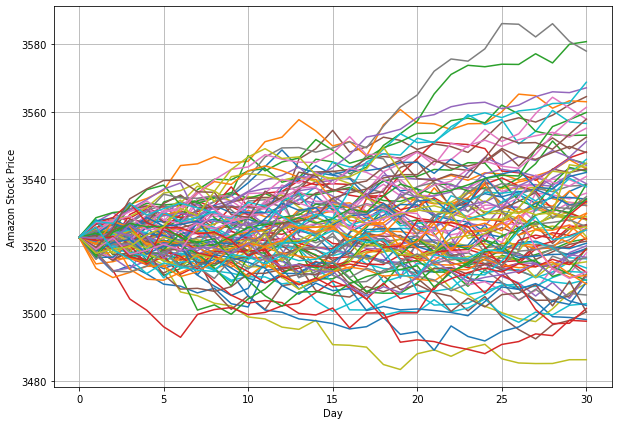

In [123]:
# preset random seed
np.random.seed(2)

# number of simulations
n_sims = 100

# stock information
s0 = amzn_close[-1]
r = 0.02 / 252
dt = 1 
sigma = float(vol/252)

# number of days
n_days = 30

# array of random numbers (delete first element)
epsilon = np.random.normal(size= (n_sims*n_days + n_sims))
epsilon = np.delete(epsilon, 0)

# create lammba
Lambda = r * dt + sigma * np.sqrt(dt) * epsilon
Lambda[n_days:n_days * n_sims + n_sims:n_days+1] = -1

ones = -np.ones((n_sims*n_days + n_sims))
ones[0:-1:n_days+1]= 1

m = diags([Lambda+1, ones],[-1,0], format='csc')

y = np.zeros((n_sims*n_days + n_sims))
y[0:-1:n_days+1] = s0

X = linalg.spsolve(m,y)
X = np.reshape(X, (n_sims, n_days+1))

rows, cols = X.shape
if rows <= 100:
  plt.figure(figsize=(10,7))
  for i in range(n_sims):
    plt.plot(X[i,:])
  print(X.shape)
  plt.grid(True)
  plt.xlabel('Day')
  plt.ylabel('Amazon Stock Price')


In [124]:
def lognormal(x, sigma, r, t, s0=amzn_close[-1]):
  exp_num = -(np.log(x) - np.log(s0) - (r - sigma**2 / 2) * t)**2
  exp_dem = 2* sigma**2 * t

  exp_term = np.exp(exp_num/exp_dem)
  prefactor = 1/ (x*sigma* np.sqrt(2*np.pi*t))

  return np.multiply(prefactor, exp_term)

Text(0, 0.5, 'Density Function')

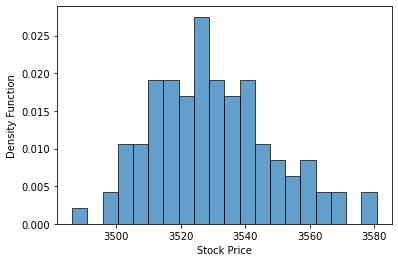

In [129]:
prices = X[:, -1]
n, bins, patches = plt.hist(prices, bins = 20, ec='k', density=True, alpha=0.7)
plt.xlabel('Stock Price')
plt.ylabel('Density Function')